# 1. 손실 함수의 성능 비교 실험
- 텐서플로는 30여종의 손실 함수 제공
- http://keras.io./losses

# 1-1. 평균제곱오차와 교차 엔트로피를 비교하는 프로그램
- 공정한 비교를 위해 하이퍼 매개변수는 동일하게 설정

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 평균 제곱 오차를 사용한 모델
dmlp_mse = Sequential()
dmlp_mse.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2, activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden3, activation='tanh'))
dmlp_mse.add(Dense(units=n_hidden4, activation='tanh'))
dmlp_mse.add(Dense(units=n_output, activation='softmax'))

# 신경망 학습
dmlp_mse.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_mse = dmlp_mse.fit(x_train, y_train, batch_size=128, epochs=30,validation_data=(x_test, y_test), verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce = Sequential()
dmlp_ce.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden3, activation='tanh'))
dmlp_ce.add(Dense(units=n_hidden4, activation='tanh'))
dmlp_ce.add(Dense(units=n_output, activation='softmax'))
# 신경망 학습
dmlp_ce.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)
# 두 모델의 정확률 비교
res_mse = dmlp_mse.evaluate(x_test, y_test, verbose=0)
print('mean_squared_error_accuracy = ', res_mse[1]*100)
res_ce  = dmlp_ce.evaluate(x_test, y_test, verbose=0)
print('crossentropy_accuracy = ',res_ce[1]*100)

Epoch 1/30
469/469 - 6s - loss: 0.0155 - accuracy: 0.8978 - val_loss: 0.0084 - val_accuracy: 0.9462
Epoch 2/30
469/469 - 5s - loss: 0.0080 - accuracy: 0.9488 - val_loss: 0.0072 - val_accuracy: 0.9547
Epoch 3/30
469/469 - 5s - loss: 0.0063 - accuracy: 0.9601 - val_loss: 0.0060 - val_accuracy: 0.9615
Epoch 4/30
469/469 - 6s - loss: 0.0050 - accuracy: 0.9683 - val_loss: 0.0052 - val_accuracy: 0.9660
Epoch 5/30
469/469 - 6s - loss: 0.0044 - accuracy: 0.9722 - val_loss: 0.0056 - val_accuracy: 0.9651
Epoch 6/30
469/469 - 5s - loss: 0.0042 - accuracy: 0.9734 - val_loss: 0.0056 - val_accuracy: 0.9661
Epoch 7/30
469/469 - 5s - loss: 0.0035 - accuracy: 0.9779 - val_loss: 0.0047 - val_accuracy: 0.9701
Epoch 8/30
469/469 - 5s - loss: 0.0034 - accuracy: 0.9785 - val_loss: 0.0053 - val_accuracy: 0.9656
Epoch 9/30
469/469 - 5s - loss: 0.0029 - accuracy: 0.9819 - val_loss: 0.0048 - val_accuracy: 0.9708
Epoch 10/30
469/469 - 5s - loss: 0.0027 - accuracy: 0.9829 - val_loss: 0.0047 - val_accuracy: 0.9706

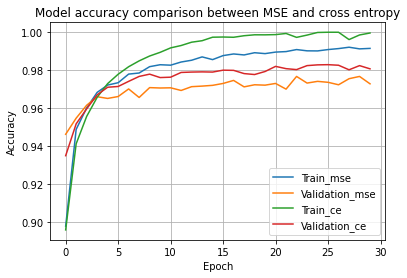

In [2]:
import matplotlib.pyplot as plt

#accuracy 곡선
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse', 'Validation_mse', 'Train_ce', 'Validation_ce'], loc = 'best')
plt.grid()
plt.show()

# 2. 옵티마이저의 성능 비교 실험
- 4가지 옵티마이저의 성능을 비교
- 공정한 비교를 위해 모든 옵티마이저는 기본값 사용, batch_size와 epochs는 같은 값 사용

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

(x_train,  y_train), (x_test, y_test)=fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 하이퍼 매개변수 설정
bs = 256
n_epoch = 50

# 모델을 설계해 주는 함수 (모델을 나타내는 객체 model을 반환)
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
    model.add(Dense(units=n_hidden2, activation='relu'))
    model.add(Dense(units=n_hidden3, activation='relu'))
    model.add(Dense(units=n_hidden4, activation='relu'))
    model.add(Dense(units=n_output, activation='softmax'))

    return model

# SGD 옵티마이저를 사용하는 모델
dmlp_sgd = build_model()
dmlp_sgd.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
hist_sgd = dmlp_sgd.fit(x_train, y_train, batch_size=bs, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam = build_model()
dmlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist_adam = dmlp_adam.fit(x_train, y_train, batch_size=bs, epochs=n_epoch, validation_data=(x_test, y_test), verbose=2)

# Adagrad 옵티마이저를 사용하는 모델
dmlp_adagrad = build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist_adagrad = dmlp_adagrad.fit(x_train, y_train, batch_size=bs, epochs=n_epoch, validation_data = (x_test, y_test), verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop = build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
hist_rmsprop = dmlp_rmsprop.fit(x_train, y_train, batch_size=bs, epochs=n_epoch, validation_data = (x_test, y_test),verbose=2)

# 네 모델의 정확률 비교
print('SGD_accuracy = ', dmlp_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)
print('Adam_accuracy = ', dmlp_adam.evaluate(x_test, y_test, verbose=0)[1]*100)
print('Adagrad_accuracy = ', dmlp_adagrad.evaluate(x_test, y_test, verbose=0)[1]*100)
print('RMSprop_accuracy = ', dmlp_rmsprop.evaluate(x_test, y_test, verbose=0)[1]*100)


Epoch 1/50
235/235 - 4s - loss: 1.3675 - accuracy: 0.6165 - val_loss: 0.8553 - val_accuracy: 0.6920
Epoch 2/50
235/235 - 3s - loss: 0.7212 - accuracy: 0.7577 - val_loss: 0.7068 - val_accuracy: 0.7471
Epoch 3/50
235/235 - 3s - loss: 0.6059 - accuracy: 0.7935 - val_loss: 0.6017 - val_accuracy: 0.7871
Epoch 4/50
235/235 - 3s - loss: 0.5488 - accuracy: 0.8116 - val_loss: 0.5357 - val_accuracy: 0.8166
Epoch 5/50
235/235 - 4s - loss: 0.5139 - accuracy: 0.8214 - val_loss: 0.5305 - val_accuracy: 0.8123
Epoch 6/50
235/235 - 3s - loss: 0.4862 - accuracy: 0.8301 - val_loss: 0.5048 - val_accuracy: 0.8228
Epoch 7/50
235/235 - 3s - loss: 0.4712 - accuracy: 0.8352 - val_loss: 0.4941 - val_accuracy: 0.8274
Epoch 8/50
235/235 - 4s - loss: 0.4539 - accuracy: 0.8421 - val_loss: 0.5586 - val_accuracy: 0.8128
Epoch 9/50
235/235 - 4s - loss: 0.4425 - accuracy: 0.8458 - val_loss: 0.4572 - val_accuracy: 0.8408
Epoch 10/50
235/235 - 4s - loss: 0.4348 - accuracy: 0.8480 - val_loss: 0.5395 - val_accuracy: 0.7968

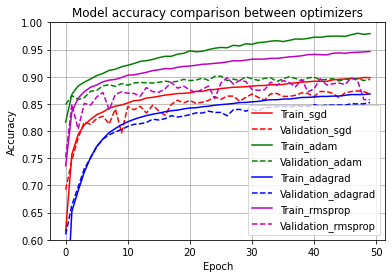

In [4]:
# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'], 'r')
plt.plot(hist_sgd.history['val_accuracy'], 'r--')
plt.plot(hist_adam.history['accuracy'], 'g')
plt.plot(hist_adam.history['val_accuracy'], 'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'], 'b--')
plt.plot(hist_rmsprop.history['accuracy'], 'm')
plt.plot(hist_rmsprop.history['val_accuracy'], 'm--')
plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6, 1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd', 'Validation_sgd', 'Train_adam', 'Validation_adam', 'Train_adagrad','Validation_adagrad','Train_rmsprop','Validation_rmsprop'], loc='best')
plt.grid()
plt.show()

# 3. 교차 검증을 이용한 하이퍼파라미터 최적화
- 교차 검증은 우연을 베제하는데 효가적
- 교차 검증으로 성능 측정의 신뢰도 높임
- 텐서플로우는 교차 검증을 지원하는 함수가 없어 직접 작성해야 한다.
    - cross_validation 함수
    - k개로 분할하는 일은 sklearn의 kFold 함수 이용

In [ ]:
from sklearn.model_selection import KFold
k=5

def cross_validation(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        dmlp = build_model()
        dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        dmlp.fit(xtrain, ytrain, batch_size = bs, epochs=n_epoch, verbose=0)
        accuracy.append(dmlp.evaluate(xval, yval, verbose=0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd = cross_validation(SGD())
acc_adam = cross_validation(Adam())
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())

SGD_accuracy =  0.8732833385467529
Adam_accuracy =  0.8957333326339721
Adagrad_accracy =  0.8574666619300843


NameError: name 'acc' is not defined

SGD_accuracy =  0.8732833385467529
Adam_accuracy =  0.8957333326339721
Adagrad_accracy =  0.8574666619300843
RMSprop_accuracy =  0.8883333325386047


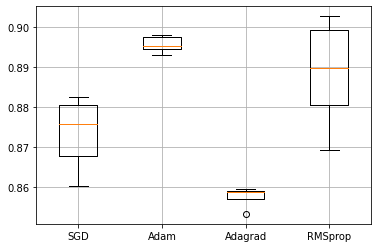

In [6]:
# 네 모델의 정확률 비교
print('SGD_accuracy = ', np.array(acc_sgd).mean())
print('Adam_accuracy = ', np.array(acc_adam).mean())
print('Adagrad_accracy = ', np.array(acc_adagrad).mean())
print('RMSprop_accuracy = ', np.array(acc_rmsprop).mean())

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels=['SGD', 'Adam', 'Adagrad', 'RMSprop'])
plt.grid()

# 4. 과다한 계산 시간과 해결책

- 교차 검증은 많은 시간 소요
    - 교차 검증을 이용한 하이퍼 파라미터 최적화 계산 시간분석
    - for문은 k번 반복. fit 함수는 가장 많은 시간 소요. fit가 소요하는 시간을 t라 하면 k*t만큼 지나야 옵티마이저 하나 처리
    - 옵티마이저가 4개이므로 4kt 시간 소요(t=5분, k=5라면 4*5*5=100분 소요)
    - k=10으로 늘이고 n_epoch를 20에서 100으로 늘리면 1000분(약 16.6시간) 소요

- 실제에서는
    - 데이터 크기가 MNIST에 비해 수십~수백 배
    - 더 많은 하이퍼 매개변수를 동시에 최적화
    - 예를 들어, 옵티마이저 4개, 학습률 7개, 미니배치 크기 6개라면 총 168개의 조합

- 해결책
    - GPU 사용
    - 욕심을 버림(경험을 통해 조합의 수를 축소)